In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# Importando e conferindo o dataframe

In [2]:
df = pd.read_excel("datasets/AdventureWorks.xlsx")

In [3]:
pd.options.display.float_format = '{:20,.2f}'.format #formatando os números de ponto flutuante

In [4]:
df.head(3)
#Conferindo as 3 primeiras linhas do dataframe

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
df.dtypes
#verificando o tipo dos dados

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [6]:
df.info()
#consultando os dados do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [7]:
df.isna().sum()
#Verificando se existem dados nulos

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [8]:
df.columns
#listando cabeçalhos

Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')

# Enriquecendo o Dataframe

In [9]:
df["Dias de Envio"] = df["Data Envio"] - df["Data Venda"] 
#Cria nova coluna com o tempo de envio

In [10]:
print(df["Dias de Envio"])

0     20 days
1      5 days
2      6 days
3      6 days
4      7 days
        ...  
899   13 days
900   11 days
901    4 days
902    4 days
903    4 days
Name: Dias de Envio, Length: 904, dtype: timedelta64[ns]


In [11]:
df["Dias de Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
#Retira a string da coluna "Dias de Envio"

In [12]:
df["Custo Total"] = df["Custo Unitário"] * df["Quantidade"] 
#Calcula o custo total em uma nova coluna

In [13]:
df["Lucro Bruto"] = df["Valor Venda"] - df["Custo Total"]
#Calcula e cria a coluna 'Lucro Bruto'

In [14]:
df["Lucro Líquido"] = df["Lucro Bruto"] - df["Valor Desconto"] 
#'Lucro Líquido'

# Analisando os dados

In [15]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)
#Vendo a quantidade de cada produto vendido

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

In [16]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro Líquido"].sum()
#Marcas mais vendidas por ano

Data Venda  Marca          
2008        Adventure Works             241,528.96
            Contoso                      41,130.30
            Fabrikam                  1,344,984.43
2009        Adventure Works             308,022.40
            Contoso                     102,043.60
            Fabrikam                    837,145.94
Name: Lucro Líquido, dtype: float64

In [17]:
df["Valor Venda"].describe()

count                 904.00
mean                6,620.14
std                 4,319.41
min                   159.84
25%                 3,920.00
50%                 5,798.70
75%                 7,986.00
max                29,400.00
Name: Valor Venda, dtype: float64

# Plotando gráficos

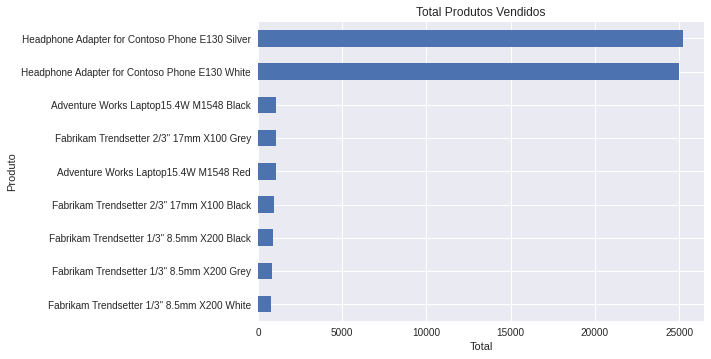

In [18]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");
#gráfico de barras horizontais (barh)

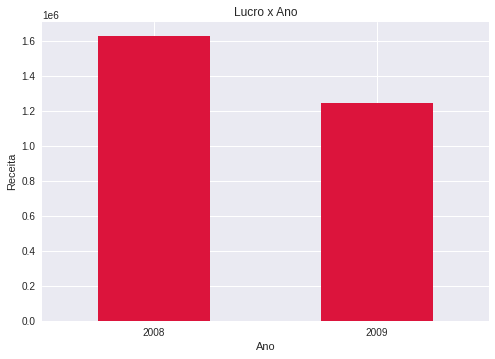

In [19]:
df.groupby(df["Data Venda"].dt.year)["Lucro Líquido"].sum().plot.bar(color="crimson")
plt.title("Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")
plt.xticks(rotation='horizontal');

In [20]:
df_2008 = df[df["Data Venda"].dt.year == 2008]
#Seleciona apenas as vendas de 2008

df_2009 = df[df["Data Venda"].dt.year == 2009]
#Seleciona vendas de 2009

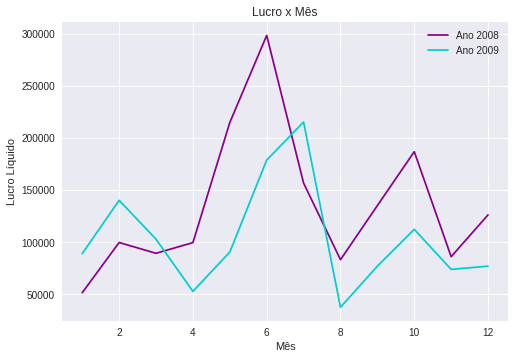

In [21]:
df_2008.groupby(df_2008["Data Venda"].dt.month)["Lucro Líquido"].sum().plot(color='darkmagenta', label='Ano 2008')
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro Líquido"].sum().plot(color='darkturquoise', label='Ano 2009')
plt.title("Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro Líquido")
plt.legend()
plt.show()

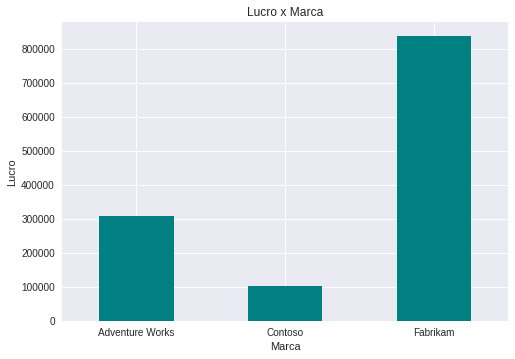

In [22]:
df_2009.groupby("Marca")["Lucro Líquido"].sum().plot.bar(title="Lucro x Marca", color="teal")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal'); 
#xticks rotaciona a marcação no eixo x

# identificando outliers

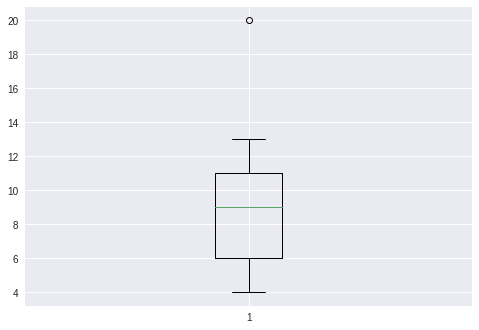

In [24]:
plt.boxplot(df["Dias de Envio"]);

In [25]:
df["Dias de Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Dias de Envio, dtype: float64

In [26]:
df[df["Dias de Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Dias de Envio,Custo Total,Lucro Bruto,Lucro Líquido
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,20,"2,091.48","2,456.52","2,456.52"


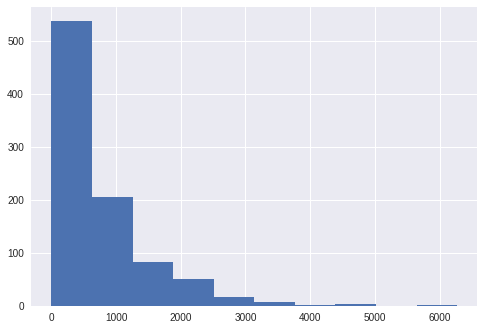

In [27]:
plt.hist(df["Valor Desconto"]);

In [29]:
df["Valor Desconto"].describe()

count                 904.00
mean                  689.12
std                   822.36
min                     0.00
25%                     0.00
50%                   461.17
75%                 1,005.08
max                 6,272.00
Name: Valor Desconto, dtype: float64

In [31]:
df[df["Valor Desconto"] == 6272.00]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Dias de Envio,Custo Total,Lucro Bruto,Lucro Líquido
339,2008-12-16,2008-12-27,199,1203,18897,200812164CS805,324.69,980.00,32,"6,272.00","25,088.00",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,11,"10,390.08","14,697.92","8,425.92"


In [ ]:
#salvando arquivo

In [35]:
df.to_csv('datasets/AdventureWorks_final.csv', index=False)